In [1]:
from CART import ClassificationTree
from Tree import DecisionTree
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix , roc_curve , auc , classification_report ,accuracy_score
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 忽略警告
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

(32561, 15)
(16282, 15)
训练集缺失值行数： 0
测试集缺失值行数： 1
删除缺失值后测试集缺失值行数： 0
(32561, 15)
(16281, 15)



KeyboardInterrupt



In [ ]:
# 读取数据
columns_list = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']
train_data = pd.read_csv("../data/adult.data",header=None,names=columns_list)
test_data = pd.read_csv("../data/adult.test",header=None,names=columns_list)

In [ ]:
print(train_data.shape)
print(test_data.shape)

In [ ]:
# 查看缺失值
missing_rows_train  = train_data.isnull().sum(axis=1)
missing_rows_test  = test_data.isnull().sum(axis=1)
print("训练集缺失值行数：",len(missing_rows_train[missing_rows_train > 0]))
print("测试集缺失值行数：",len(missing_rows_test[missing_rows_test > 0]))

In [ ]:
# 删除测试集具有缺失值的行
test_data = test_data.dropna().reset_index(drop=True)
missing_rows_test  = test_data.isnull().sum(axis=1)
print("删除缺失值后测试集缺失值行数：",len(missing_rows_test[missing_rows_test > 0]))
print(train_data.shape)
print(test_data.shape)

In [ ]:
# 标签化
train_data['label'] = train_data['label'].apply(lambda x:1 if x==" <=50K" else 0)
test_data['label'] = test_data['label'].apply(lambda x:1 if x==" <=50K." else 0)

print("训练集标签分布:\n",train_data['label'].value_counts())
print("测试集标签分布:\n",test_data['label'].value_counts())

In [ ]:
train_data.info()

In [ ]:
test_data.info()

In [ ]:
# 将训练集的数据类型和测试集的数据类型进行统一
train_data[["fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]] = train_data[["fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]].astype(np.float64)
test_data["age"] = test_data["age"].astype(np.int64)

In [127]:
# 对age数据进行划分 18岁以下岁为 青少年 ；18-45岁为 青年 ；46-69岁为中年；69岁以上为 老年
def split_age(x):
    if x < 18:
        return "juvenile"
    elif 18<= x < 45:
        return "youth"
    elif 45 <= x < 69:
        return "midlife"
    else:
        return "old age"

train_data["age"] = train_data["age"].apply(lambda x:split_age(x))
test_data["age"] = test_data["age"].apply(lambda x:split_age(x))

In [128]:
# 将连续型数据分组化
for item in ["fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]:
    train_data[item] = pd.cut(train_data[item], 5)
    test_data[item] = pd.cut(test_data[item],5)

In [129]:
# 标签编码
encoder = LabelEncoder()
features = [item for item in list(train_data.columns) if item != "label"]
for items in features:
    train_data[items] = encoder.fit_transform(train_data[items])
    test_data[items] = encoder.fit_transform(test_data[items])

In [130]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int32
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int32
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int32
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int32
 11  capital-loss    32561 non-null  int32
 12  hours-per-week  32561 non-null  int32
 13  native-country  32561 non-null  int32
 14  label           32561 non-null  int64
dtypes: int32(14), int64(1)
memory usage: 2.0 MB


In [131]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,3,7,0,9,3,4,1,1,4,1,0,0,1,39,1
1,1,6,0,9,3,2,4,0,4,1,0,0,0,39,1
2,3,4,0,11,2,0,6,1,4,1,0,0,1,39,1
3,1,4,0,1,1,2,6,0,2,1,0,0,1,39,1
4,3,4,1,9,3,2,10,5,2,0,0,0,1,5,1


In [132]:
# 特征标签分离
X_train, y_train = np.array(train_data)[:,:-1], np.array(train_data)[:,-1] 
X_test, y_test = np.array(test_data)[:,:-1], np.array(test_data)[:,-1]

In [173]:
model = ClassificationTree()

In [174]:
print('正在运行中······\n')
model.fit(X_test, y_test)
print('运行结束!!!\n')

正在运行中······

运行结束!!!



In [ ]:
# 测试数据
print(model.score(X_test, y_test))

In [175]:
# 预测值
y_pred = model.predict(X_test)

In [176]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8506848473680978


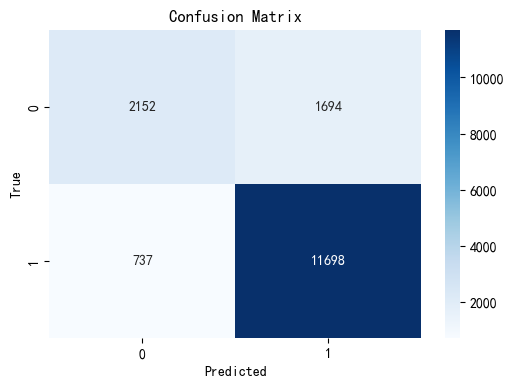

In [177]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建一个热力图
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 设置坐标轴标签和标题
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# 显示图形
plt.show()

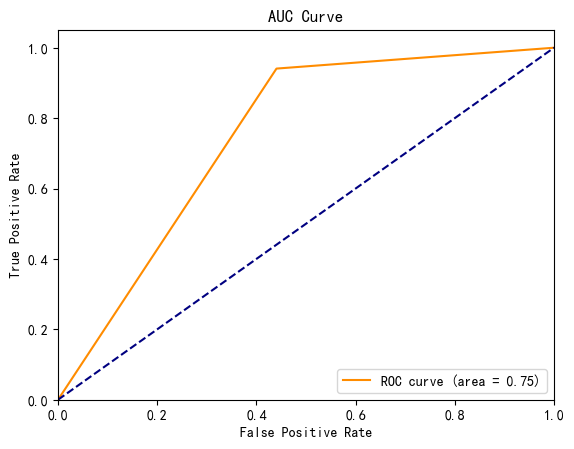

In [178]:
# AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# 计算AUC值
auc_value = auc(fpr, tpr)

# 绘制AUC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [179]:
# Report
report = classification_report(y_test, y_pred)

# 打印分类报告
print(report)

              precision    recall  f1-score   support

           0       0.74      0.56      0.64      3846
           1       0.87      0.94      0.91     12435

    accuracy                           0.85     16281
   macro avg       0.81      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281

